In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [71]:
sber_data = pd.read_csv('data/sber_data.csv')
sber_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


In [72]:
display(sber_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30471 non-null  int64  
 1   full_sq                                30471 non-null  int64  
 2   life_sq                                24088 non-null  float64
 3   floor                                  30304 non-null  float64
 4   sub_area                               30471 non-null  object 
 5   preschool_quota                        23783 non-null  float64
 6   preschool_education_centers_raion      30471 non-null  int64  
 7   school_quota                           23786 non-null  float64
 8   school_education_centers_raion         30471 non-null  int64  
 9   school_education_centers_top_20_raion  30471 non-null  int64  
 10  hospital_beds_raion                    16030 non-null  float64
 11  he

None

In [73]:
display(sber_data.shape)

(30471, 61)

In [74]:
display(sber_data['sub_area'].value_counts().shape)

(146,)

In [75]:
display(sber_data['price_doc'].max())Operating system


111111112

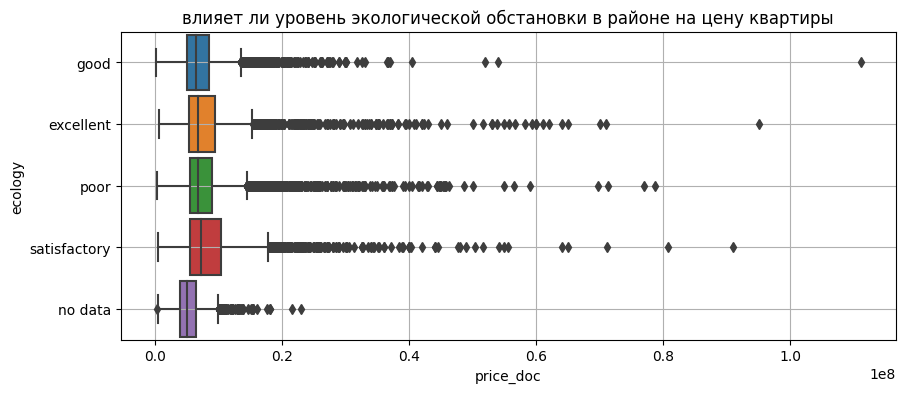

In [76]:
fig = plt.figure(figsize=(10, 4))
boxplot = sns.boxplot(
    data=sber_data,
    y='ecology',
    x='price_doc',
    orient='h',
    width=0.9
)
boxplot.set_title('влияет ли уровень экологической обстановки в районе на цену квартиры');
boxplot.set_xlabel('price_doc');
boxplot.set_ylabel('ecology');
boxplot.grid()

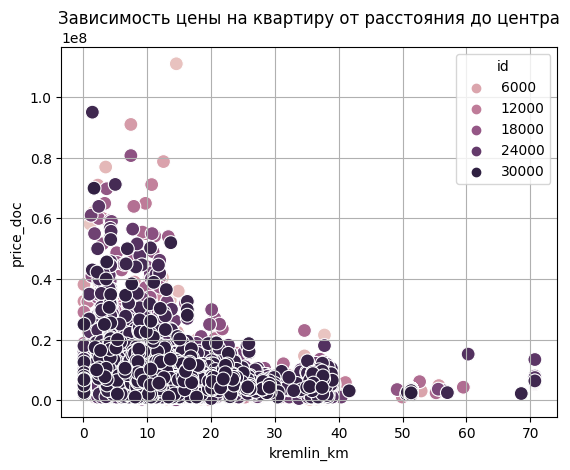

In [77]:
jointplot = sns.scatterplot(
    data=sber_data, 
    x='kremlin_km', 
    y='price_doc',
    hue='id',
    s=100
    #xlim = (0, 40),
    #ylim = (0, 0.1),
    #height=8,
)
jointplot.set_title('Зависимость цены на квартиру от расстояния до центра');
jointplot.set_xlabel('kremlin_km');
jointplot.set_ylabel('price_doc');
jointplot.grid()

Метод межквартильного размаха (метод Тьюки)

In [89]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [79]:
sber_dt = pd.read_csv('data/sber_data.csv')
outliers, cleaned = outliers_iqr_mod(sber_dt, 'full_sq', 1, 6)

print(outliers.shape[0])

59


Метод z-отклонений (метод сигм)

In [1]:
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    """Поиск аномалий методом Z-отклонений

    Args:
        data: датафрейм
        feature: рассматриваемый признак
        log_scale (bool, optional): логарифмирование признака (по умолчанию - False)
        left: левая граница метода (по умолчанию - 3)
        right: правая граница метода (по умолчанию - 3)

    Returns:
        outliers - датафрейм с выбросами
        cleaned - датафрейм без выбросов
    """
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [86]:
outliers, cleaned = outliers_z_score_mod(sber_data, 'mkad_km', 3, 3.5, log_scale=True)

print(outliers.shape[0])

0


Text(0.5, 1.0, 'log_price_doc Distribution')

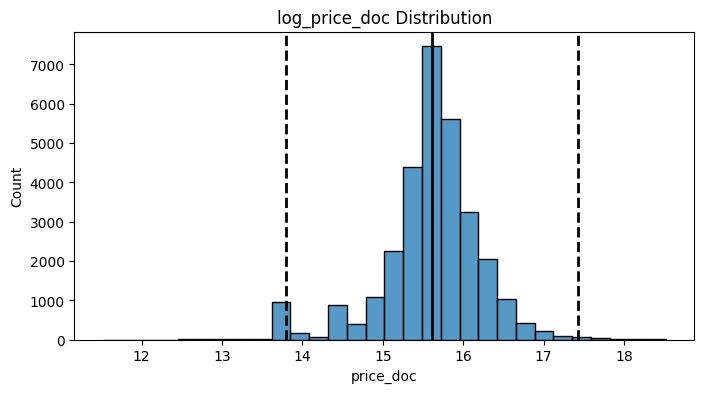

In [82]:
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_price_doc = np.log(sber_data['price_doc']+1)
histplot = sns.histplot(log_price_doc, bins=30, ax=ax)
histplot.axvline(log_price_doc.mean(), color='k', lw=2)
histplot.axvline(log_price_doc.mean()+ 3 * log_price_doc.std(), color='k', ls='--', lw=2)
histplot.axvline(log_price_doc.mean()- 3 * log_price_doc.std(), color='k', ls='--', lw=2)
histplot.set_title('log_price_doc Distribution')
#ax.set_xticks([8,16,32])
#logbins = np.logspace(np.log10(histplot[0]),np.log10(bins[-1]),len(bins))
#histplot.hist(x, bins=logbins)

In [83]:
outliers, cleaned = outliers_z_score_mod(sber_data, 'price_doc', 3.7, 3.7, log_scale=True)

print(outliers.shape[0])

52


In [90]:
sber_dt = pd.read_csv('data/sber_data.csv')
outliers, cleaned = outliers_iqr_mod(sber_dt, 'price_doc', 3, 3, log_scale=True)

print(outliers.shape[0])

92
